In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.01,0.02,0.03,0.04,0.051,0.061,0.071,0.081,0.091,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1
y,0.16,0.55,0.29,0.41,0.93,0.34,0.45,0.6,0.96,0.7,0.37,0.43,0.24,0.92,0.69,0.94,0.64,0.86,0.82,0.49,0.63,0.93,0.12,0.91,0.14,0.97,0.28,0.12,0.85,0.99,0.18,0.054,0.67,0.84,1,0.3,0.89,0.41,0.73,0.51,0.081,0.57,0.97,0.32,0.33,0.43,0.82,0.13,0.9,0.44,0.43,0.023,0.026,0.61,0.71,0.77,0.055,0.96,0.58,0.02,0.81,0.74,0.56,0.49,0.93,0.3,0.44,0.029,0.63,0.21,0.49,0.0055,0.69,0.48,0.72,0.22,0.1,0.51,0.061,0.83,0.32,0.98,0.17,0.029,0.066,0.18,0.55,0.87,0.24,0.71,0.97,0.79,0.79,0.53,0.86,0.01,0.6,0.48,0.39,0.71
a,0,5.6e-05,0.00012,0.00038,0.0015,0.00086,0.0017,0.003,0.0063,0.0058,0.0038,0.0053,0.0035,0.016,0.014,0.022,0.017,0.025,0.027,0.018,0.026,0.042,0.0057,0.049,0.0082,0.062,0.02,0.0086,0.068,0.085,0.017,0.0053,0.07,0.093,0.12,0.037,0.12,0.057,0.11,0.079,0.013,0.097,0.17,0.061,0.066,0.088,0.18,0.029,0.21,0.11,0.11,0.006,0.0071,0.18,0.21,0.24,0.018,0.32,0.2,0.007,0.3,0.28,0.22,0.2,0.39,0.13,0.19,0.013,0.3,0.1,0.25,0.0028,0.37,0.26,0.4,0.13,0.059,0.31,0.038,0.53,0.21,0.66,0.12,0.021,0.047,0.13,0.42,0.67,0.19,0.57,0.8,0.67,0.68,0.47,0.78,0.0094,0.56,0.47,0.38,0.71


In [4]:
p['a']

a,0,5.6e-05,0.00012,0.00038,0.0015,0.00086,0.0017,0.003,0.0063,0.0058,0.0038,0.0053,0.0035,0.016,0.014,0.022,0.017,0.025,0.027,0.018,0.026,0.042,0.0057,0.049,0.0082,0.062,0.02,0.0086,0.068,0.085,0.017,0.0053,0.07,0.093,0.12,0.037,0.12,0.057,0.11,0.079,0.013,0.097,0.17,0.061,0.066,0.088,0.18,0.029,0.21,0.11,0.11,0.006,0.0071,0.18,0.21,0.24,0.018,0.32,0.2,0.007,0.3,0.28,0.22,0.2,0.39,0.13,0.19,0.013,0.3,0.1,0.25,0.0028,0.37,0.26,0.4,0.13,0.059,0.31,0.038,0.53,0.21,0.66,0.12,0.021,0.047,0.13,0.42,0.67,0.19,0.57,0.8,0.67,0.68,0.47,0.78,0.0094,0.56,0.47,0.38,0.71


In [5]:
np.array(p['a'])

array([0.00000000e+00, 5.57807542e-05, 1.20214349e-04, 3.79555744e-04,
       1.52601036e-03, 8.55444481e-04, 1.65233696e-03, 2.97918090e-03,
       6.27456882e-03, 5.80043244e-03, 3.80897611e-03, 5.29353043e-03,
       3.46951995e-03, 1.58850537e-02, 1.38143185e-02, 2.16218754e-02,
       1.67812137e-02, 2.53537160e-02, 2.69554767e-02, 1.81706612e-02,
       2.57978825e-02, 4.20100697e-02, 5.69253204e-03, 4.91968404e-02,
       8.24341103e-03, 6.21038000e-02, 1.96206214e-02, 8.55602887e-03,
       6.83615957e-02, 8.53483838e-02, 1.65938560e-02, 5.31946190e-03,
       6.98264330e-02, 9.33187431e-02, 1.17614580e-01, 3.71181981e-02,
       1.17636839e-01, 5.67801595e-02, 1.07089037e-01, 7.91976729e-02,
       1.32425961e-02, 9.74787170e-02, 1.73788508e-01, 6.11002972e-02,
       6.56573895e-02, 8.81914461e-02, 1.76081231e-01, 2.86875491e-02,
       2.10907244e-01, 1.08476569e-01, 1.09464520e-01, 6.03433852e-03,
       7.05237483e-03, 1.75599587e-01, 2.09929928e-01, 2.38809539e-01,
      

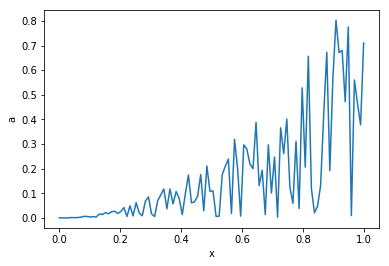

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.04,0.44,0.77,0.82,0.32,0.13,0.56,0.88,0.8,0.17,0.044,0.61,0.85,0.31,0.8,0.83,0.89,0.64,0.88,0.066,0.19,0.099,0.092,0.45,0.62,0.27,0.86,0.25,0.91,0.67,0.092,0.074,0.93,0.55,0.34,0.4,0.64,0.87,0.53,0.35,0.89,0.54,0.1,0.91,0.065,0.56,0.42,0.99,0.69,0.032,0.59,0.58,0.47,0.22,0.031,0.46,0.28,0.81,0.63,0.27,0.19,0.94,0.96,0.23,0.12,0.49,0.19,0.18,1,0.86,1,0.06,0.046,0.0022,0.67,0.99,0.43,0.68,0.33,0.52,0.87,0.16,0.73,0.49,0.14,0.082,0.057,0.37,0.28,1,0.35,0.61,0.2,0.44,0.26,0.38,0.63,0.012,0.58,0.62


In [9]:
p.interp(p2)

x,0.04,0.44,0.77,0.82,0.32,0.13,0.56,0.88,0.8,0.17,0.044,0.61,0.85,0.31,0.8,0.83,0.89,0.64,0.88,0.066,0.19,0.099,0.092,0.45,0.62,0.27,0.86,0.25,0.91,0.67,0.092,0.074,0.93,0.55,0.34,0.4,0.64,0.87,0.53,0.35,0.89,0.54,0.1,0.91,0.065,0.56,0.42,0.99,0.69,0.032,0.59,0.58,0.47,0.22,0.031,0.46,0.28,0.81,0.63,0.27,0.19,0.94,0.96,0.23,0.12,0.49,0.19,0.18,1,0.86,1,0.06,0.046,0.0022,0.67,0.99,0.43,0.68,0.33,0.52,0.87,0.16,0.73,0.49,0.14,0.082,0.057,0.37,0.28,1,0.35,0.61,0.2,0.44,0.26,0.38,0.63,0.012,0.58,0.62
y,0.94,0.27,0.047,0.88,0.5,0.79,0.12,0.87,0.48,0.67,0.79,0.84,0.083,-0.029,0.83,-0.0056,0.33,0.61,0.89,0.51,0.53,0.4,0.65,0.41,0.62,0.03,0.33,0.98,0.96,0.4,0.64,0.71,0.81,0.85,0.93,0.21,0.7,0.39,0.52,0.38,0.29,0.68,0.4,0.93,0.51,0.45,0.81,0.44,0.63,0.5,0.0062,0.79,0.33,0.2,0.44,0.6,0.47,0.32,0.44,0.22,0.56,0.53,0.1,0.59,0.22,0.67,0.64,0.88,0.53,0.32,0.67,0.45,0.63,0.35,0.4,0.39,0.37,0.32,0.88,0.0053,0.85,0.65,0.68,0.63,0.72,0.97,0.35,0.41,0.55,0.53,0.67,0.89,0.65,0.26,0.13,0.55,0.51,0.52,0.76,0.59
a,0.0015,0.051,0.027,0.59,0.052,0.014,0.037,0.67,0.3,0.019,0.0014,0.31,0.061,-0.0029,0.53,-0.0019,0.26,0.25,0.69,0.0021,0.019,0.0038,0.0055,0.084,0.24,0.0024,0.25,0.062,0.8,0.18,0.0054,0.0039,0.7,0.26,0.11,0.034,0.29,0.29,0.15,0.046,0.23,0.2,0.0046,0.77,0.002,0.14,0.14,0.43,0.3,0.00055,0.0016,0.27,0.071,0.011,0.00043,0.13,0.037,0.21,0.18,0.016,0.02,0.46,0.099,0.032,0.003,0.16,0.022,0.028,0.53,0.24,0.67,0.0016,0.0012,-5.6e-06,0.18,0.38,0.068,0.15,0.098,0.0014,0.65,0.018,0.36,0.15,0.015,0.0065,0.0013,0.057,0.043,0.53,0.079,0.33,0.026,0.051,0.0092,0.08,0.2,7.6e-05,0.26,0.23


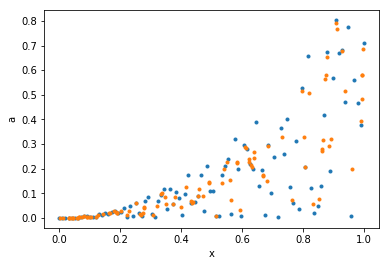

In [10]:
p.plot('x', 'a', '.')
p.interp(p2[['x']], method='linear').plot('x', 'a', '.')

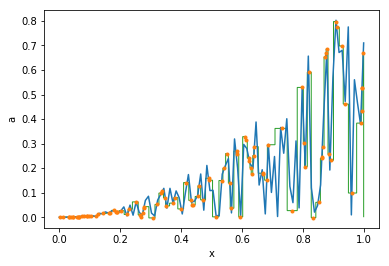

In [11]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [12]:
p.interp(p2)

x,0.04,0.44,0.77,0.82,0.32,0.13,0.56,0.88,0.8,0.17,0.044,0.61,0.85,0.31,0.8,0.83,0.89,0.64,0.88,0.066,0.19,0.099,0.092,0.45,0.62,0.27,0.86,0.25,0.91,0.67,0.092,0.074,0.93,0.55,0.34,0.4,0.64,0.87,0.53,0.35,0.89,0.54,0.1,0.91,0.065,0.56,0.42,0.99,0.69,0.032,0.59,0.58,0.47,0.22,0.031,0.46,0.28,0.81,0.63,0.27,0.19,0.94,0.96,0.23,0.12,0.49,0.19,0.18,1,0.86,1,0.06,0.046,0.0022,0.67,0.99,0.43,0.68,0.33,0.52,0.87,0.16,0.73,0.49,0.14,0.082,0.057,0.37,0.28,1,0.35,0.61,0.2,0.44,0.26,0.38,0.63,0.012,0.58,0.62
y,0.94,0.27,0.047,0.88,0.5,0.79,0.12,0.87,0.48,0.67,0.79,0.84,0.083,-0.029,0.83,-0.0056,0.33,0.61,0.89,0.51,0.53,0.4,0.65,0.41,0.62,0.03,0.33,0.98,0.96,0.4,0.64,0.71,0.81,0.85,0.93,0.21,0.7,0.39,0.52,0.38,0.29,0.68,0.4,0.93,0.51,0.45,0.81,0.44,0.63,0.5,0.0062,0.79,0.33,0.2,0.44,0.6,0.47,0.32,0.44,0.22,0.56,0.53,0.1,0.59,0.22,0.67,0.64,0.88,0.53,0.32,0.67,0.45,0.63,0.35,0.4,0.39,0.37,0.32,0.88,0.0053,0.85,0.65,0.68,0.63,0.72,0.97,0.35,0.41,0.55,0.53,0.67,0.89,0.65,0.26,0.13,0.55,0.51,0.52,0.76,0.59
a,0.0015,0.051,0.027,0.59,0.052,0.014,0.037,0.67,0.3,0.019,0.0014,0.31,0.061,-0.0029,0.53,-0.0019,0.26,0.25,0.69,0.0021,0.019,0.0038,0.0055,0.084,0.24,0.0024,0.25,0.062,0.8,0.18,0.0054,0.0039,0.7,0.26,0.11,0.034,0.29,0.29,0.15,0.046,0.23,0.2,0.0046,0.77,0.002,0.14,0.14,0.43,0.3,0.00055,0.0016,0.27,0.071,0.011,0.00043,0.13,0.037,0.21,0.18,0.016,0.02,0.46,0.099,0.032,0.003,0.16,0.022,0.028,0.53,0.24,0.67,0.0016,0.0012,-5.6e-06,0.18,0.38,0.068,0.15,0.098,0.0014,0.65,0.018,0.36,0.15,0.015,0.0065,0.0013,0.057,0.043,0.53,0.079,0.33,0.026,0.051,0.0092,0.08,0.2,7.6e-05,0.26,0.23


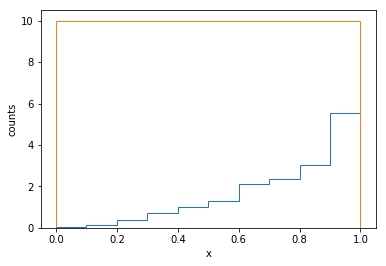

In [13]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
g.plot('counts')

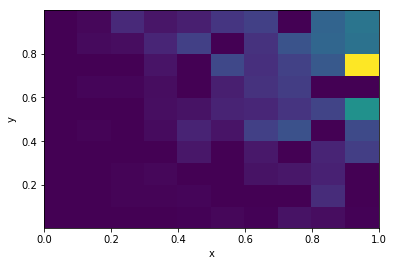

In [14]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [15]:
gn['a']

y \ x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
[0.01 0.1 ],0,0,0,0.0053,0.013,0.038,0.013,0.1,0.068,0.0094
[0.1 0.2],0,0,0.022,0.017,0.029,0,0,0,0.25,0
[0.2 0.3],0.00012,0.0035,0.02,0.037,0,0,0.1,0.13,0.19,0
[0.3 0.4],0.00086,0.0038,0,0,0.13,0,0.13,0,0.21,0.38
[0.4 0.5],0.002,0.023,0,0.057,0.2,0.11,0.39,0.51,0,0.47
[0.5 0.6],0.003,0,0,0.079,0.097,0.2,0.22,0.31,0.42,1
[0.6 0.7],0,0.031,0.026,0.07,0,0.18,0.3,0.37,0,0
[0.7 0.8],0.0058,0,0,0.11,0,0.45,0.28,0.4,0.57,2.1
[0.8 0.9],0,0.052,0.068,0.21,0.39,0,0.3,0.53,0.67,0.78
[0.9 1. ],0.0078,0.038,0.24,0.12,0.17,0.32,0.39,0,0.66,0.8


In [16]:
np.sum(gn['a'], axis='y')

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
a,0.02,0.15,0.37,0.7,1,1.3,2.1,2.3,3,5.5


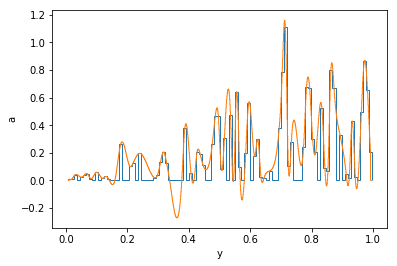

In [17]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

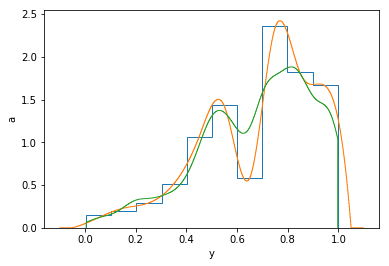

In [18]:
p.histogram('y', density=True).plot('a')
p.histogram(y=np.linspace(-0.1,1.1,13), density=True).interp(y=1000).plot('a')
p.kde(y=1000, density=True, bw=0.05).plot('a')

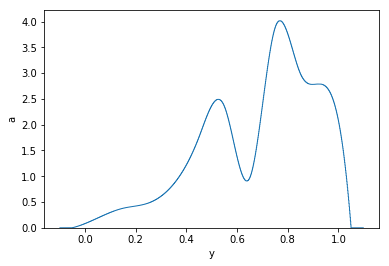

In [19]:
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000, method='cubic').plot('a')

In [20]:
g = p.histogram(x=10)

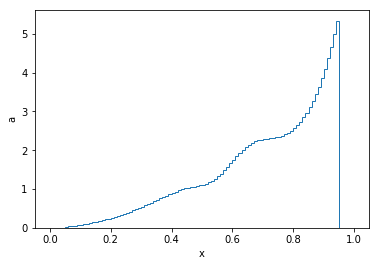

In [21]:
g.interp(x=100).plot('a')

In [22]:
g.interp(x=100)

x,[0. 0.01],[0.01 0.02],[0.02 0.03],[0.03 0.04],[0.04 0.05],[0.05 0.06],[0.06 0.07],[0.07 0.08],[0.08 0.09],[0.09 0.1 ],[0.1 0.11],[0.11 0.12],[0.12 0.13],[0.13 0.14],[0.14 0.15],[0.15 0.16],[0.16 0.17],[0.17 0.18],[0.18 0.19],[0.19 0.2 ],[0.2 0.21],[0.21 0.22],[0.22 0.23],[0.23 0.24],[0.24 0.25],[0.25 0.26],[0.26 0.27],[0.27 0.28],[0.28 0.29],[0.29 0.3 ],[0.3 0.31],[0.31 0.32],[0.32 0.33],[0.33 0.34],[0.34 0.35],[0.35 0.36],[0.36 0.37],[0.37 0.38],[0.38 0.39],[0.39 0.4 ],[0.4 0.41],[0.41 0.42],[0.42 0.43],[0.43 0.44],[0.44 0.45],[0.45 0.46],[0.46 0.47],[0.47 0.48],[0.48 0.49],[0.49 0.5 ],[0.5 0.51],[0.51 0.52],[0.52 0.53],[0.53 0.54],[0.54 0.55],[0.55 0.56],[0.56 0.57],[0.57 0.58],[0.58 0.59],[0.59 0.6 ],[0.6 0.61],[0.61 0.62],[0.62 0.63],[0.63 0.64],[0.64 0.65],[0.65 0.66],[0.66 0.67],[0.67 0.68],[0.68 0.69],[0.69 0.7 ],[0.7 0.71],[0.71 0.72],[0.72 0.73],[0.73 0.74],[0.74 0.75],[0.75 0.76],[0.76 0.77],[0.77 0.78],[0.78 0.79],[0.79 0.8 ],[0.8 0.81],[0.81 0.82],[0.82 0.83],[0.83 0.84],[0.84 0.85],[0.85 0.86],[0.86 0.87],[0.87 0.88],[0.88 0.89],[0.89 0.9 ],[0.9 0.91],[0.91 0.92],[0.92 0.93],[0.93 0.94],[0.94 0.95],[0.95 0.96],[0.96 0.97],[0.97 0.98],[0.98 0.99],[0.99 1. ]
y,nan,nan,nan,nan,nan,5.5,5.7,5.9,6,6.2,6.2,6.3,6.4,6.4,6.4,6.4,6.4,6.4,6.3,6.3,6.2,6.2,6.1,6,6,5.9,5.9,5.8,5.8,5.8,5.7,5.7,5.7,5.6,5.6,5.6,5.5,5.5,5.4,5.4,5.3,5.3,5.2,5.1,5,4.9,4.8,4.7,4.6,4.5,4.4,4.3,4.2,4.2,4.2,4.2,4.3,4.4,4.5,4.6,4.8,4.9,5,5.1,5.1,5.1,5.1,5,4.9,4.8,4.7,4.6,4.4,4.3,4.2,4.1,4,3.9,3.9,3.9,3.9,3.9,3.9,4,4.1,4.2,4.3,4.4,4.6,4.8,5,5.2,5.5,5.7,6,nan,nan,nan,nan,nan
a,nan,nan,nan,nan,nan,0.024,0.034,0.045,0.056,0.069,0.082,0.096,0.11,0.13,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.31,0.33,0.36,0.39,0.42,0.45,0.48,0.51,0.54,0.58,0.61,0.65,0.68,0.72,0.76,0.79,0.83,0.87,0.9,0.93,0.96,0.99,1,1,1,1.1,1.1,1.1,1.1,1.1,1.2,1.2,1.3,1.3,1.4,1.5,1.6,1.7,1.8,1.8,1.9,2,2.1,2.1,2.2,2.2,2.3,2.3,2.3,2.3,2.3,2.3,2.3,2.3,2.4,2.4,2.5,2.5,2.6,2.6,2.7,2.8,3,3.1,3.3,3.4,3.6,3.9,4.1,4.4,4.7,5,5.3,nan,nan,nan,nan,nan
counts,nan,nan,nan,nan,nan,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,nan,nan,nan,nan,nan


In [23]:
pn.interp(g, x=100)

x,[0. 0.01],[0.01 0.02],[0.02 0.03],[0.03 0.04],[0.04 0.05],[0.05 0.06],[0.06 0.07],[0.07 0.08],[0.08 0.09],[0.09 0.1 ],[0.1 0.11],[0.11 0.12],[0.12 0.13],[0.13 0.14],[0.14 0.15],[0.15 0.16],[0.16 0.17],[0.17 0.18],[0.18 0.19],[0.19 0.2 ],[0.2 0.21],[0.21 0.22],[0.22 0.23],[0.23 0.24],[0.24 0.25],[0.25 0.26],[0.26 0.27],[0.27 0.28],[0.28 0.29],[0.29 0.3 ],[0.3 0.31],[0.31 0.32],[0.32 0.33],[0.33 0.34],[0.34 0.35],[0.35 0.36],[0.36 0.37],[0.37 0.38],[0.38 0.39],[0.39 0.4 ],[0.4 0.41],[0.41 0.42],[0.42 0.43],[0.43 0.44],[0.44 0.45],[0.45 0.46],[0.46 0.47],[0.47 0.48],[0.48 0.49],[0.49 0.5 ],[0.5 0.51],[0.51 0.52],[0.52 0.53],[0.53 0.54],[0.54 0.55],[0.55 0.56],[0.56 0.57],[0.57 0.58],[0.58 0.59],[0.59 0.6 ],[0.6 0.61],[0.61 0.62],[0.62 0.63],[0.63 0.64],[0.64 0.65],[0.65 0.66],[0.66 0.67],[0.67 0.68],[0.68 0.69],[0.69 0.7 ],[0.7 0.71],[0.71 0.72],[0.72 0.73],[0.73 0.74],[0.74 0.75],[0.75 0.76],[0.76 0.77],[0.77 0.78],[0.78 0.79],[0.79 0.8 ],[0.8 0.81],[0.81 0.82],[0.82 0.83],[0.83 0.84],[0.84 0.85],[0.85 0.86],[0.86 0.87],[0.87 0.88],[0.88 0.89],[0.89 0.9 ],[0.9 0.91],[0.91 0.92],[0.92 0.93],[0.93 0.94],[0.94 0.95],[0.95 0.96],[0.96 0.97],[0.97 0.98],[0.98 0.99],[0.99 1. ]
y,nan,nan,nan,nan,nan,5.5,5.7,5.9,6,6.2,6.2,6.3,6.4,6.4,6.4,6.4,6.4,6.4,6.3,6.3,6.2,6.2,6.1,6,6,5.9,5.9,5.8,5.8,5.8,5.7,5.7,5.7,5.6,5.6,5.6,5.5,5.5,5.4,5.4,5.3,5.3,5.2,5.1,5,4.9,4.8,4.7,4.6,4.5,4.4,4.3,4.2,4.2,4.2,4.2,4.3,4.4,4.5,4.6,4.8,4.9,5,5.1,5.1,5.1,5.1,5,4.9,4.8,4.7,4.6,4.4,4.3,4.2,4.1,4,3.9,3.9,3.9,3.9,3.9,3.9,4,4.1,4.2,4.3,4.4,4.6,4.8,5,5.2,5.5,5.7,6,nan,nan,nan,nan,nan
a,nan,nan,nan,nan,nan,0.024,0.034,0.045,0.056,0.069,0.082,0.096,0.11,0.13,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.31,0.33,0.36,0.39,0.42,0.45,0.48,0.51,0.54,0.58,0.61,0.65,0.68,0.72,0.76,0.79,0.83,0.87,0.9,0.93,0.96,0.99,1,1,1,1.1,1.1,1.1,1.1,1.1,1.2,1.2,1.3,1.3,1.4,1.5,1.6,1.7,1.8,1.8,1.9,2,2.1,2.1,2.2,2.2,2.3,2.3,2.3,2.3,2.3,2.3,2.3,2.3,2.4,2.4,2.5,2.5,2.6,2.6,2.7,2.8,3,3.1,3.3,3.4,3.6,3.9,4.1,4.4,4.7,5,5.3,nan,nan,nan,nan,nan
counts,nan,nan,nan,nan,nan,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,nan,nan,nan,nan,nan


In [24]:
p.histogram(x=10).grid

Grid(
Axis("x",
points = None,
edges = array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7, 0.8],
       [0.8, 0.9],
       [0.9, 1. ]]))
nbins = 10),)

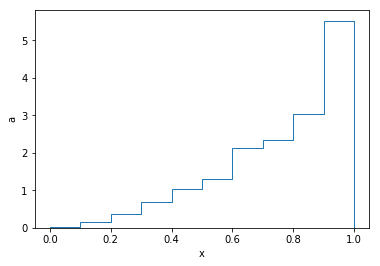

In [25]:
# or in one line
p.histogram('x').plot('a')

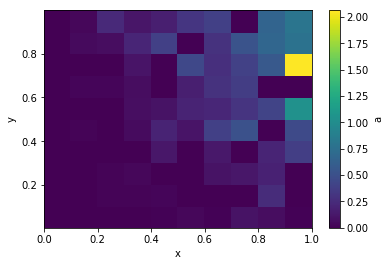

In [26]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', 'y').plot('a', cbar=True)

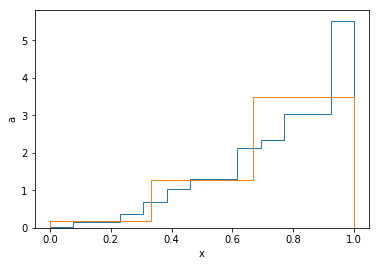

In [27]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [28]:
g['a']

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
a,0.02,0.15,0.37,0.7,1,1.3,2.1,2.3,3,5.5


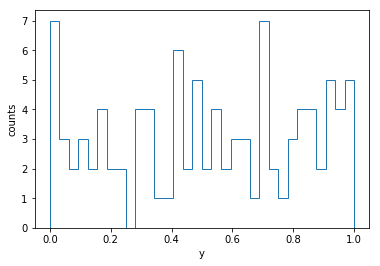

In [29]:
p.histogram(y=np.linspace(0,1,33)).plot('counts')

In [30]:
# the returned object is a GridData type
g = p.histogram(x=20)

In [31]:
# it has a grid defined
g

x,[0. 0.05],[0.05 0.1 ],[0.1 0.15],[0.15 0.2 ],[0.2 0.25],[0.25 0.3 ],[0.3 0.35],[0.35 0.4 ],[0.4 0.45],[0.45 0.5 ],[0.5 0.55],[0.55 0.6 ],[0.6 0.65],[0.65 0.7 ],[0.7 0.75],[0.75 0.8 ],[0.8 0.85],[0.85 0.9 ],[0.9 0.95],[0.95 1. ]
y,2.3,3,2.7,3.8,2.7,3.2,2.7,2.8,2.3,2.7,1.8,2.4,3.5,1.6,2.4,1.7,1.6,2.6,3.9,2.2
a,0.0021,0.018,0.042,0.11,0.13,0.24,0.3,0.4,0.41,0.61,0.51,0.78,1.4,0.74,1.3,1.1,1.1,2,3.4,2.1
counts,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [32]:
1//2

0